# Test simple RNN, LSTM and GRU models

### load data

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import re
import sys

import tensorflow as tf
import tensorflow.keras as K

from tensorflow.keras.utils import plot_model
from utils import get_train_data

In [13]:
if sys.platform == "linux":
    physical_devices = tf.config.experimental.list_physical_devices("GPU")
    if len(physical_devices) > 0:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [14]:
X_train, y_train = get_train_data()

id4_hook_1|reversed: False|data shape: (1054, 36)
--------------------
id3_hook_2|reversed: False|data shape: (1297, 36)
--------------------
id4_hook_2|reversed: False|data shape: (1059, 36)
--------------------
id2_hook_2|reversed: False|data shape: (1041, 36)
--------------------
id0_hook_1|reversed: False|data shape: (1100, 36)
--------------------
id1_hook_2|reversed: False|data shape: (792, 36)
--------------------
id0_hook_2|reversed: False|data shape: (1051, 36)
--------------------
id3_hook_1|reversed: False|data shape: (1461, 36)
--------------------
id2_hook_1|reversed: False|data shape: (1013, 36)
--------------------
id1_hook_1|reversed: False|data shape: (858, 36)
--------------------
id4_jab_1|reversed: False|data shape: (911, 36)
--------------------
id2_jab_2|reversed: False|data shape: (1030, 36)
--------------------
id0_jab_2|reversed: False|data shape: (993, 36)
--------------------
id0_jab_1|reversed: False|data shape: (952, 36)
--------------------
id1_jab_2|rever

In [15]:
TIME_STEPS = 30 # expect camera 30 fps, so process 1 sample per second

# Number of samples in batch
N_train = X_train.shape[0] // TIME_STEPS 

X_train = X_train[:N_train * TIME_STEPS].reshape(-1, TIME_STEPS, 36)
y_train = y_train[:N_train * TIME_STEPS].reshape(-1, TIME_STEPS, 1)

In [16]:
y_train = K.utils.to_categorical(y_train, num_classes=7)
X_train = tf.constant(X_train)

## Simple RNN 

In [17]:
def get_model():
    return K.Sequential([
        K.layers.InputLayer((30, 36), batch_size=1),
        K.layers.SimpleRNN(64, stateful=True, return_sequences=True),
        K.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(l2=1e-3)),
        K.layers.Dense(7, activation='softmax')
    ])

In [18]:
model = get_model()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (1, 30, 64)               6464      
_________________________________________________________________
dense_2 (Dense)              (1, 30, 128)              8320      
_________________________________________________________________
dense_3 (Dense)              (1, 30, 7)                903       
Total params: 15,687
Trainable params: 15,687
Non-trainable params: 0
_________________________________________________________________


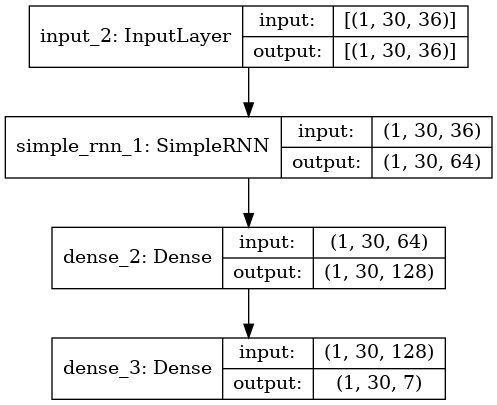

In [20]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_split=0.33, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
693/693 [==============================] - 3s 4ms/step - loss: 1.1307 - accuracy: 0.5249 - val_loss: 2.0770 - val_accuracy: 0.4505
Epoch 2/10
693/693 [==============================] - 2s 3ms/step - loss: 0.9721 - accuracy: 0.6483 - val_loss: 2.1057 - val_accuracy: 0.4540
Epoch 3/10
693/693 [==============================] - 2s 3ms/step - loss: 0.9309 - accuracy: 0.6741 - val_loss: 2.1686 - val_accuracy: 0.4702
Epoch 4/10
693/693 [==============================] - 3s 4ms/step - loss: 0.8988 - accuracy: 0.6860 - val_loss: 2.2129 - val_accuracy: 0.4782
Epoch 5/10
693/693 [==============================] - 3s 5ms/step - loss: 0.8698 - accuracy: 0.7021 - val_loss: 2.2141 - val_accuracy: 0.4961
Epoch 6/10
693/693 [==============================] - 2s 3ms/step - loss: 0.8419 - accuracy: 0.7064 - val_loss: 2.2329 - val_accuracy: 0.5222
Epoch 7/10
693/693 [==============================] - 3s 4ms/step - loss: 0.8216 - accuracy: 0.7138 - val_loss: 2.2292 - val_accuracy: 0.5527
Epoch 

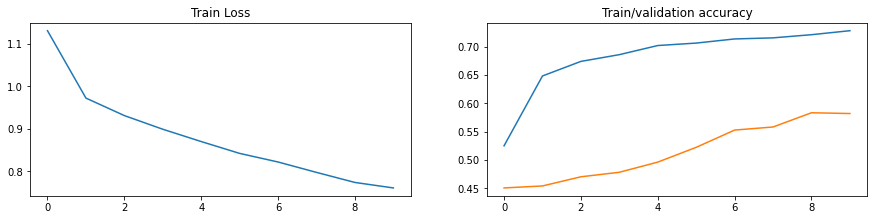

In [23]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## LSTM

In [24]:
def get_model():
    return K.Sequential([
        K.layers.InputLayer((30, 36), batch_size=1),
        K.layers.LSTM(64, return_sequences=True),
        K.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(l2=1e-3)),
        K.layers.Dense(7, activation='softmax')
    ])

In [25]:
model = get_model()

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 30, 64)               25856     
_________________________________________________________________
dense_4 (Dense)              (1, 30, 128)              8320      
_________________________________________________________________
dense_5 (Dense)              (1, 30, 7)                903       
Total params: 35,079
Trainable params: 35,079
Non-trainable params: 0
_________________________________________________________________


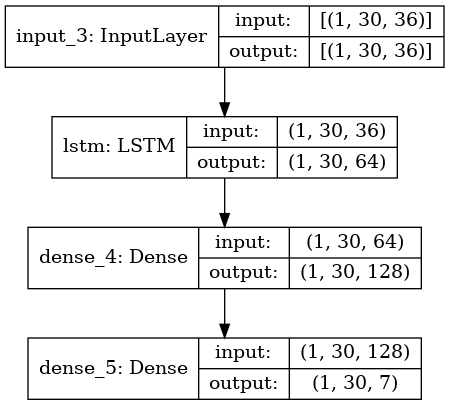

In [27]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, validation_split=0.33, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
693/693 [==============================] - 6s 6ms/step - loss: 1.1585 - accuracy: 0.5138 - val_loss: 2.0205 - val_accuracy: 0.4263
Epoch 2/10
693/693 [==============================] - 4s 6ms/step - loss: 0.9609 - accuracy: 0.6581 - val_loss: 2.0710 - val_accuracy: 0.4588
Epoch 3/10
693/693 [==============================] - 4s 6ms/step - loss: 0.8804 - accuracy: 0.6985 - val_loss: 2.0405 - val_accuracy: 0.5169
Epoch 4/10
693/693 [==============================] - 4s 6ms/step - loss: 0.8190 - accuracy: 0.7212 - val_loss: 2.0638 - val_accuracy: 0.5480
Epoch 5/10
693/693 [==============================] - 4s 6ms/step - loss: 0.7908 - accuracy: 0.7292 - val_loss: 2.0827 - val_accuracy: 0.5691
Epoch 6/10
693/693 [==============================] - 4s 5ms/step - loss: 0.7600 - accuracy: 0.7368 - val_loss: 2.1529 - val_accuracy: 0.5815
Epoch 7/10
693/693 [==============================] - 4s 5ms/step - loss: 0.7501 - accuracy: 0.7422 - val_loss: 2.2111 - val_accuracy: 0.5897
Epoch 

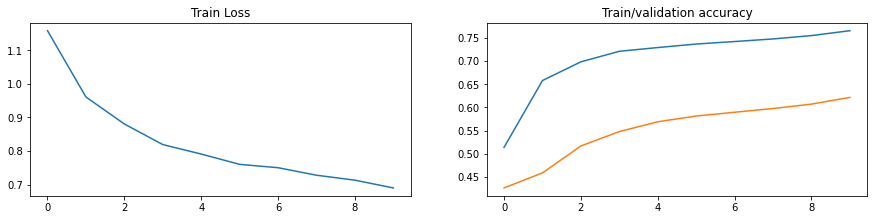

In [30]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## GRU

In [31]:
def get_model():
    return K.Sequential([
        K.layers.InputLayer((30, 36), batch_size=1),
        K.layers.GRU(64, return_sequences=True),
        K.layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l2(l2=1e-3)),
        K.layers.Dense(7, activation='softmax')
    ])

In [32]:
model = get_model()

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (1, 30, 64)               19584     
_________________________________________________________________
dense_6 (Dense)              (1, 30, 128)              8320      
_________________________________________________________________
dense_7 (Dense)              (1, 30, 7)                903       
Total params: 28,807
Trainable params: 28,807
Non-trainable params: 0
_________________________________________________________________


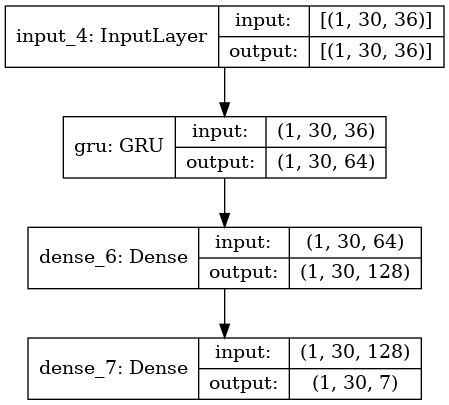

In [34]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [35]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.33, batch_size=1, epochs=10, shuffle=False)

Epoch 1/10
693/693 [==============================] - 6s 7ms/step - loss: 1.0912 - accuracy: 0.5589 - val_loss: 2.1985 - val_accuracy: 0.4391
Epoch 2/10
693/693 [==============================] - 4s 6ms/step - loss: 0.9505 - accuracy: 0.6795 - val_loss: 2.1890 - val_accuracy: 0.4654
Epoch 3/10
153/693 [=====>........................] - ETA: 2s - loss: 1.0607 - accuracy: 0.6702

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(221)
plt.title("Train Loss")
plt.plot(history.history['loss'])
plt.subplot(222)
plt.title("Train/validation accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])